In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML

import warnings 
warnings.simplefilter("ignore")

# Введение в моделирование по методу Монте-Карло

Аналитикам данных часто требуется точно оценить вероятность неопределенных событий. Например, какова вероятность того, что денежные потоки для нового продукта будут демонстрировать положительную чистую приведенную стоимость (ЧПС)? Каков фактор риска инвестиционного портфеля? Метод Монте-Карло позволяет моделировать ситуации, проявляющие неопределенность, и затем воспроизводить их на компьютере тысячи раз.

>Термин "моделирование по методу Монте-Карло" пришел из моделирования на вычислительных машинах, выполнявшегося в 1930-х и 1940-х годах для оценки вероятности успешной цепной реакции, необходимой для взрыва атомной бомбы. Физики, принимавшие участие в этих работах, были большими поклонниками азартных игр, поэтому метод моделирования получил кодовое название Монте-Карло.

### Где применяется моделирование по методу Монте-Карло?
Во многих компаниях моделирование по методу Монте-Карло является важной частью процесса принятия решений. 

- Компания General Motors, например, моделирует для корпорации прогноз по чистой прибыли, по структурным затратам и затратам на приобретение, а также по чувствительности к различным видам риска (таким как изменения процентных ставок и колебания обменного курса).
- Компания Lilly с помощью моделирования определяет оптимальную производственную мощность для каждого лекарственного препарата.
- Компания Proctor&Gamble с помощью метода Монте-Карло моделирует и оптимально хеджирует валютные риски.
- Компания Sears с помощью моделирования определяет, сколько единиц продукции из каждой товарной линии необходимо заказать у поставщиков, например, количество брюк Dockers на этот год.
- Нефтяные и фармацевтические компании моделируют оценку реальных возможностей, например, оценку возможности расширения, заключения сделки или отсрочки проекта.
- Специалисты по финансовому планированию с помощью моделирования по методу Монте-Карло определяют оптимальные инвестиционные стратегии для выхода на пенсию своих клиентов.

***
Автодилер считает, что спрос на модели 2015 г. распределяется по нормальному закону со средним значением 200 и стандартным отклонением 30. Он получает Envoy за 25 000 долларов и продает за 40 000 долларов. Половину автомобилей, не проданных по полной цене, можно продать по 30 000 долларов. Дилер рассматривает варианты заказа на 200, 220, 240, 269, 280 или 300 штук. Сколько автомобилей он должен заказать?

In [3]:
from scipy.stats import norm

In [39]:
np.random.seed(223)
mean, sigma = 200, 30
demand = norm.ppf(np.random.rand(), mean, sigma)

226.93754957603227

In [22]:
unit_cost = 25000
selling_price = 40000
order_quantity = 240
salvage_value = 30000

In [129]:
def dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand):

    order_cost = unit_cost * order_quantity
    sales_revenue = min(order_quantity, demand) * selling_price
    salvage_revenue = 0.5 * max(0, order_quantity - demand) * salvage_value
    profit = sales_revenue + salvage_revenue - order_cost
    return profit

In [130]:
dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)

975000.0

In [124]:
demand_simulations = norm.rvs(mean, sigma, size=1000) #np.around(np.random.normal(mean, sigma, 1000))

In [50]:
order_values = range(200, 320, 20)

In [131]:
simulations = []
for order_quantity in order_values:
        simulation = pd.Series([dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)
                                          for demand in demand_simulations])
        simulations.append(simulation)

In [132]:
profit_sim = pd.concat(simulations, axis=1)
profit_sim.columns = list(order_values)

In [133]:
profit_sim.describe()

,200,220,240,260,280,300
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.679017e+06,2.659704e+06,2.539652e+06,2.365853e+06,2.171671e+06,1.972288e+06
std,4.658315e+05,6.170832e+05,7.144858e+05,7.585764e+05,7.715531e+05,7.732465e+05
min,7.016339e+05,5.016339e+05,3.016339e+05,1.016339e+05,-9.836610e+04,-2.983661e+05
25%,2.478169e+06,2.278169e+06,2.078169e+06,1.878169e+06,1.678169e+06,1.478169e+06
50%,2.973209e+06,2.773209e+06,2.573209e+06,2.373209e+06,2.173209e+06,1.973209e+06
75%,3.000000e+06,3.293332e+06,3.093332e+06,2.893332e+06,2.693332e+06,2.493332e+06
max,3.000000e+06,3.300000e+06,3.600000e+06,3.900000e+06,4.200000e+06,4.250365e+06


У 200 меньше риска (меньше стандартное отклонение), поэтому лучше заказать 200 машин. Похоже, 200 или 220 — два лучших варианта

***
Небольшой супермаркет пытается определить, сколько экземпляров журнала "People" необходимо заказывать каждую неделю. Владелец считает, что спрос на журнал соответствует дискретной случайной величине

|Спрос|Вероятность|
|--|--|
|15|0.10|
|20|0.20|
|25|0.30|
|30|0.25|
|35|0.15|

Супермаркет платит за каждый экземпляр журнала 1,00 доллар и продает его за 1,95. Каждый непроданный экземпляр может быть возвращен за 0,50 доллара. Сколько экземпляров журнала еженедельно должен заказывать магазин?

In [160]:
demands = pd.DataFrame({
    'prob': (prob:= [.0, .1, .2, .3, .25, .15])[1:],
    'cum prob': np.cumsum(prob)[:-1],
    'demand': range(15, 40, 5)
})
demands

,prob,cum prob,demand
0,0.10,0.00,15
1,0.20,0.10,20
2,0.30,0.30,25
3,0.25,0.60,30
4,0.15,0.85,35


In [205]:
order_quantity = 30
unit_cost = 1
selling_price = 1.95
salvage_value = 0.5

In [299]:
np.random.random()

0.6276289056415354

In [365]:
demands[demands['cum prob'] >= min(np.random.random(), 0.85)]['demand'].iloc[0]

30

In [213]:
shop_profit(unit_cost, selling_price, order_quantity, salvage_value, 25)

21.25

In [169]:
def shop_profit(unit_cost, selling_price, order_quantity, salvage_value, demand):

    order_cost = unit_cost * order_quantity
    sales_revenue = min(order_quantity, demand) * selling_price
    salvage_revenue = max(0, order_quantity - demand) * salvage_value
    profit = sales_revenue + salvage_revenue - order_cost
    return profit

In [383]:
profit_sim = []

for order_quantity in demands.demand:
    simulations = []
    
    for _ in range(1000): 
        demand = demands[demands['cum prob'] >= min(np.random.random(), 0.85)]['demand'].iloc[0]
        profit = shop_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)
        simulations.append(profit)
    
    profit_sim.append(simulations)                                                     

In [411]:
profit = pd.DataFrame(profit_sim).T
profit.columns = demands.demand.to_list()

In [415]:
profit.agg(['mean', 'std'])

,15,20,25,30,35
mean,14.25,19.0,23.075750,25.476750,25.942000
std,0.00,0.0,2.106689,4.989267,7.296789


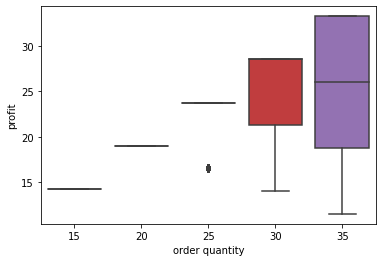

In [423]:
sns.boxplot(x="order quantity", y="profit",
             data=pd.melt(profit, var_name='order quantity', value_name='profit'));

Ожидаемая максимальная выгода при заказе 30 журналов, так как выгода сопоставима с максимально большим заказом — 35 шт. при меньшем риске (стандартное отклонение ниже).